2.1.0
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None
Train on 1105 samples, validate on 277 samples
Epoch 1/50
1105/1105 [==============================] - 1s 657us/sample - loss: 0.9337 - acc: 0.6986 - val_loss: 0.8424 - val_acc: 0.6570

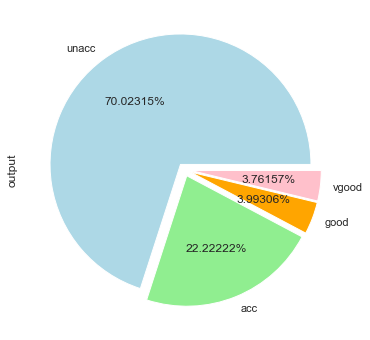

In [14]:
import sklearn
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

print(tf.__version__)

# 데이터 읽어오기
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('../data/car_evaluation.csv', names=cols, header=None)

# 앞에서 5개 데이터 샘플 출력
cars.head()

# 파이 차트 그리기
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size

cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

# 카테고리 데이터를 숫자형 데이터로 변환 -> one-hot encoding
# 현재 변환은 각 row 데이터의 output 을 기준으로 해당 column을 0,1 로 설정하는것임.
# 예를 들어 295번째 데이터의 경우 output 이 acc 이고 변환된 labels 에는 295번째 데이터의 condition_acc만 1로 코딩됨.
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)

labels.head()

# 텐서플로우 분석에 활용하기 위해 데이터를 numpy array 로 변환 -> 컬럼명이 0~3과 같이 치환됨.
y = labels.values

# The final step before we can train our TensorFlow 2.0 classification model is to divide the dataset into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 모델 트레이닝을 위한 라이브러리 import
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

# 분류 모델 생성
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

print(model.summary())

# 모델 트레이닝
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])